# Выявление определяющих успешность игры закономерностей, для интернет-магазина «Стримчик».
Из открытых источников собраны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).
В таблице присутствуют ниже описанные столбцы:
   - Name — название игры
   - Platform — платформа
   - Year_of_Release — год выпуска
   - Genre — жанр игры
   - NA_sales — продажи в Северной Америке (миллионы проданных копий)
   - EU_sales — продажи в Европе (миллионы проданных копий)
   - JP_sales — продажи в Японии (миллионы проданных копий)
   - Other_sales — продажи в других странах (миллионы проданных копий)
   - Critic_Score — оценка критиков (максимум 100)
   - User_Score — оценка пользователей (максимум 10)
   - Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

#### Предполагается в результате анализа на основе данных до 2016 года, спланировать кампанию на 2017-й, выявив определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

<a id="id0"></a>
# Содержание: 

[1. **Шаг 1. Открытие файла с данными и изучение общей информации**](#id1)<br>
[2. **Шаг 2. Подготовка данных.**](#id2)<br>
[3. **Шаг 3. Анализ данных**](#id3)<br>
[4. **Шаг 4. Составление портрета пользователя каждого региона**](#id4)<br>
[5. **Шаг 5. Проверка гипотез**](#id5)<br>
[6. **Шаг 6. Общий вывод**](#id6)<br>

<a id="id1"></a>
## Шаг 1. Открытие файла с данными и изучение общей информации
[к содержанию](#id0)<br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
df=pd.read_csv(r'/datasets/games.csv')
df2 = df.copy(deep=True)
'''
try:
    df=pd.read_csv('C:/projects/games.csv')
except:
    df=pd.read_csv(r'/datasets/games.csv')'''
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
df=pd.read_csv(r'/datasets/games.csv')
df2 = df.copy(deep=True)
'''
try:
    df=pd.read_csv('C:/projects/games.csv')
except:
    df=pd.read_csv(r'/datasets/games.csv')'''
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Вывод:
  -  В данных обнаружены пропуски, в следующих столбцах, с указанием процентного содержания относительно всех данных:

In [4]:
'''for i in df.columns:
    t = df[i].isna().sum()/len(df)
    if t != 0:
        print('{: <20}'.format(i), '{:.2%}'.format(t))
'''
df.isna().sum()/len(df)*100        

Name                0.011965
Platform            0.000000
Year_of_Release     1.609333
Genre               0.011965
NA_sales            0.000000
EU_sales            0.000000
JP_sales            0.000000
Other_sales         0.000000
Critic_Score       51.319174
User_Score         40.089740
Rating             40.478612
dtype: float64

-- Некоторые типы данных в столбцах, не удобны для анализа. Они находятся, в  столбцах: Year_of_Release, User_Score  и в последуещем, после восполнения пропусков, если таковые имеются, будут заменены. 

-- Имеются нулевые значения в столбцах продаж в разных странах, это говорит о том, что игра скорей всего, не выпускалась в продажу в этой стране.


<a id="id2"></a>
## Шаг 2. Подготовка данных
[к содержанию](#id0)<br>

-- Приведение имен столбцов к общему регистру

In [5]:
df.columns = df.columns.str.lower()

-- Восполнение пропусков
  - пропуски 'name' восполнить не представляется возможным по дате выпуска и рейтингам. Вероятней всего отсутствие назания связано с потерей данных или с некачественным переводом с языка сино-тибетского языкового семейства. Подробности стоит уточнять у дата инженеров.
  - пропуски 'genre' присутствуют в строках где отсутствует название игры, поэтому они удаляются
  - пропуски 'year_of_release' имеют количество больше процента, поэтому откинуть их будет проблематично. заполнятся условным маркером 2100 годом, чтобы при построении диаграмм эти данные были наглядные.
  - пропуски 'rating' будут заполнятся по самому часто присваиваемому рейтингу в жанре, аргументация следующая, что к примеру жанры симулятор или спорт маловероятно получат рэйтинг 18+, из чего есть предположение что некоторые жанры в большинстве случаев имеют характерный рейтинг. При необходимости использования столбца будет сравнен результат.
  

In [6]:
#'name','genre'
df.dropna(subset=['genre'],inplace=True)
#'year_of_release'
df['year_of_release'].fillna(2100, inplace=True)
#'rating'
popular_rat = df.pivot_table(index =['genre','rating'], values ='other_sales' ,aggfunc='count').reset_index()
for i in popular_rat.genre.unique():
    max_in_genre = popular_rat[popular_rat.genre == i]['other_sales'].max() #поиск макс. по жанру
    t = str(*popular_rat.query('genre==@i and other_sales==@max_in_genre').rating)
    df.loc[df['genre']==i,'rating'] = df.loc[df['genre']==i,'rating'].fillna(t)

 -- Восполнение пропусков
  - для пропусков 'critic_score','user_score' есть мысль найти кореляцию от суммы продаж в разных странах по жанрам, из тех соображений, что сообщество некоторых жанров является активным, осставляя отзывы и рейтинг в магазине. 

In [7]:
#user_score
print('user_score')
for i in df['genre'].unique():
    quer1 = df[(~df['user_score'].isna()) & (df['genre']==i) &(df['user_score']!='tbd')].copy(deep=True)
    quer1.loc[:,'user_score'] = quer1.loc[:,'user_score'].astype('float')
    sum_sales = quer1['other_sales'] + quer1['jp_sales'] +quer1['na_sales']+quer1['eu_sales']
    print(i,end=' ')
    v = sum_sales.corr(quer1['user_score'])
    print('{:.2f}'.format(v))
#'critic_score'
print()

print('critic_score')

for i in df['genre'].unique():
    quer2 = df[(~df['critic_score'].isna()) & (df['genre']==i)].copy(deep=True)
    quer2.loc[:,'critic_score'] = quer2.loc[:,'critic_score'].astype('float')
    sum_sales2 = quer2['other_sales'] + quer2['jp_sales'] +quer2['na_sales']+quer2['eu_sales']
    print(i,end=' ')
    v = sum_sales2.corr(quer2['critic_score'])
    print('{:.2f}'.format(v))

user_score
Sports 0.04
Platform 0.16
Racing 0.17
Role-Playing 0.12
Puzzle 0.14
Misc 0.08
Shooter -0.03
Simulation 0.10
Action 0.19
Fighting 0.25
Adventure 0.08
Strategy 0.09

critic_score
Sports 0.13
Platform 0.29
Racing 0.25
Role-Playing 0.41
Puzzle 0.20
Misc 0.10
Shooter 0.35
Simulation 0.24
Action 0.39
Fighting 0.38
Adventure 0.25
Strategy 0.28


 -- как видно из результатаб для различных жанров, зависимость везде слабая, поэтому в качестве заполнения удобобней будет использовать маркер -1, как для 'critic_score'  так и для 'user_score'. П.С. примеательно, что оценки играков находятся в меньшей зависимости с количеством продаж, чем оценки критиков, но это тема для другого исследования.

In [8]:
df = df.fillna(-1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null float64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       16713 non-null float64
user_score         16713 non-null object
rating             16713 non-null object
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


-- В столбце 'user_score' ткже имеются значения 'tbd' - в момент выгрузки данных, неопределенный рейтинг, возможно в магазине «Стримчик» по поводу этой игры никто не оставил отзыв или игра еще в разработке, в любом случае подобные отметуки заменятся на маркер -2 , чтобы видеть отличие с теми данными которые были пропущены. В дальнейшейшем по необходимости это будет учтено. 

In [9]:
df.loc[df['user_score']=='tbd','user_score'] = -2

Вывод: 
- Пропуски были заполнены и большая часть маркерами это надо учитывать. Средними и медианными значениями не заполнялось, потомучто это внесет существенное искажение данных.

-- Изменение типов данных в столбцах: year_of_Release (на тип целочисленного значения,  тк. год не может исчисляться половинами, это уже будут месяцы) и user_score (на тип вещественных чисел тк. это не является качественным значением)

In [10]:
df['year_of_release'] = df['year_of_release'].astype('int32')
df['user_score'] = df['user_score'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null int32
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       16713 non-null float64
user_score         16713 non-null float64
rating             16713 non-null object
dtypes: float64(6), int32(1), object(4)
memory usage: 1.5+ MB


-- Добавление столбца 'total' с сумарными продажами

In [11]:
df['total'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,E,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,T,31.38


<a id="id3"></a>
## Шаг 3. Проведение исследовательского анализа данных
[к содержанию](#id0)<br>

-- Поиск актуального периода

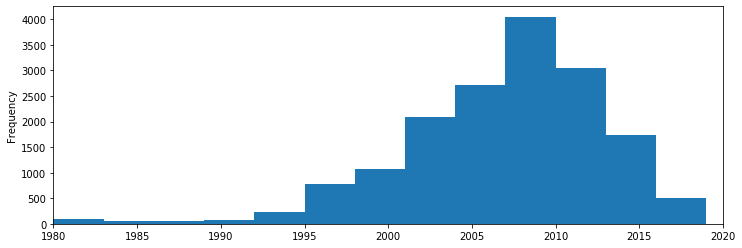

In [12]:
df['year_of_release'].plot(kind='hist',xlim = (1980,2020),bins=40,figsize=(12,4))

Вывод: Из графика видны изменения тенденций количиства игр, модой является 2007 год , после чего тенденция изменяется, поэтому актуальный период принемается с 2007 , имеется еще скачек в 2010-2011  сравним, посмотрим.

#### Выбер платформы с наибольшими суммарными продажами

PS2


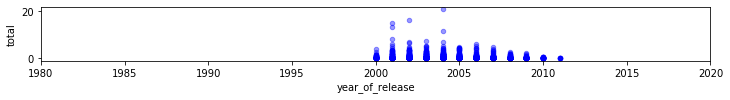

X360


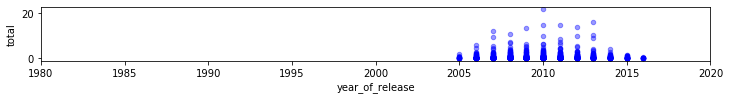

PS3


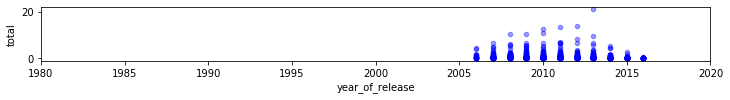

Wii


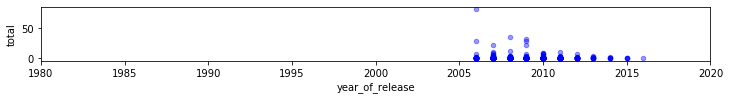

DS


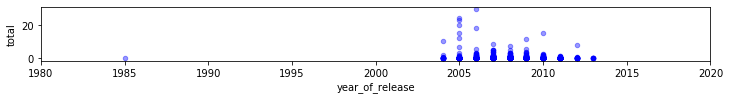

PS


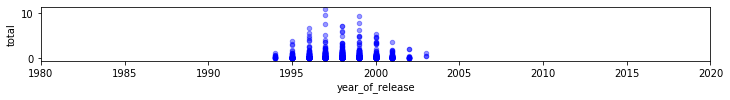

In [13]:
#получение самых популярных консолей
pop_platform = df.pivot_table(index='platform',values='total',aggfunc='sum').sort_values(by='total',ascending=False).head(6)
#постпоение диаграмм 
for i in list(pop_platform.index):
    print(i)
    df[df['platform'] ==i].plot(kind='scatter',x='year_of_release',y='total',figsize=(12,1),xlim=(1980,2020),alpha=0.4, color='blue')
    plt.show()
        

In [14]:
for i in list(pop_platform.index):
    start = df.query('year_of_release>1990 and platform==@i')['year_of_release'].min()
    end = df.query('year_of_release<2017 and platform==@i')['year_of_release'].max() 
    print('Платформа',i, 'существовала',start,'-',end,'годах.')

Платформа PS2 существовала 2000 - 2011 годах.
Платформа X360 существовала 2005 - 2016 годах.
Платформа PS3 существовала 2006 - 2016 годах.
Платформа Wii существовала 2006 - 2016 годах.
Платформа DS существовала 2004 - 2013 годах.
Платформа PS существовала 1994 - 2003 годах.


Вывод:
- Для популярных платформ характерено существование одно десятилетие.
Исходя из полученных данных стоит в качестве актуального периода принять период после 2010 года, для прогнозирования на 2017 год. Период выбран на однообразном этапе падения индустрии и достаточный для обнаружения теряющих популярность платформ.
- Выбросы в периодах существования платформ учтены в указанном интервале, появление вероятней связано с человеческим фактором внесения данных, тк подобных выбросов мало, а ошибиться в написании модели платформы из определенной линейки давольно легко. 

X360


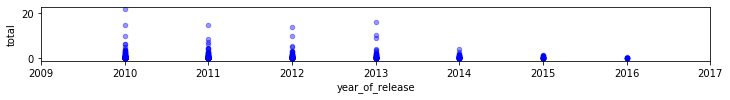

PS3


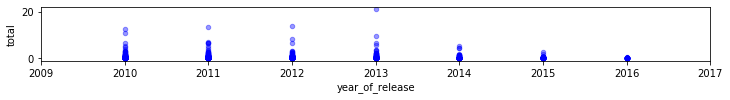

DS


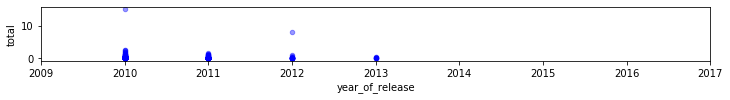

PS4


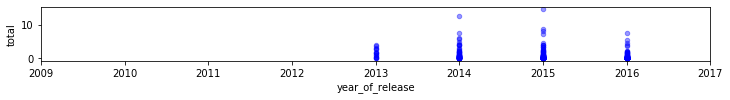

3DS


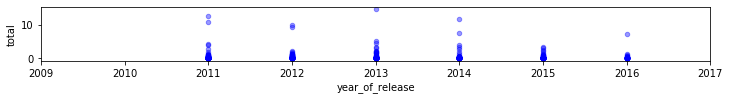

Wii


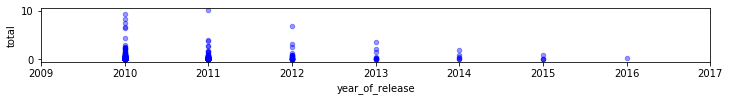

XOne


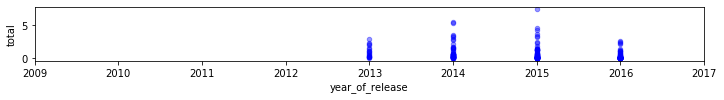

WiiU


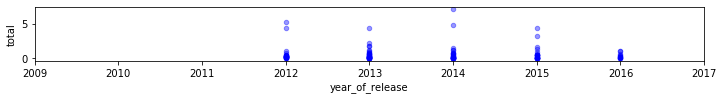

PS2


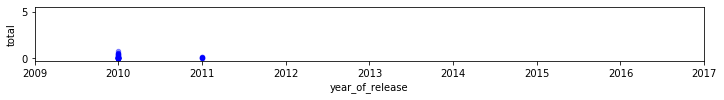

PC


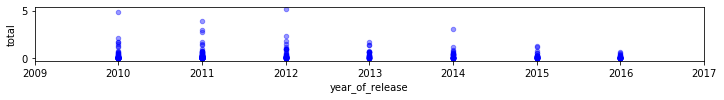

PSP


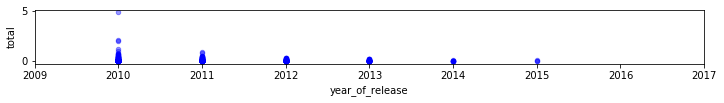

2600


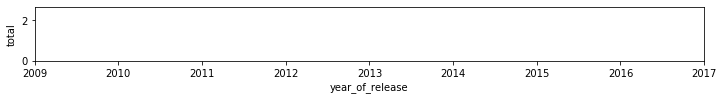

GBA


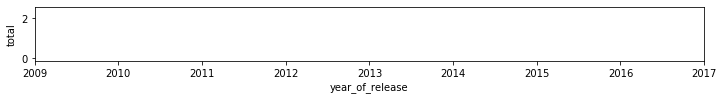

PSV


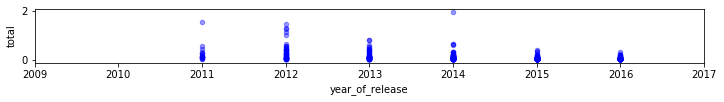

PS


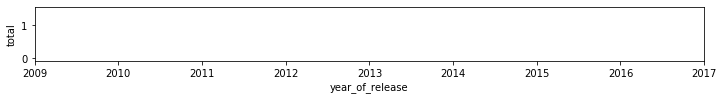

XB


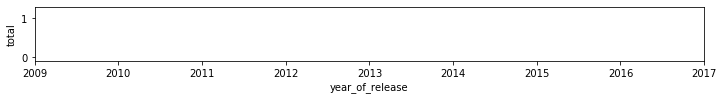

GB


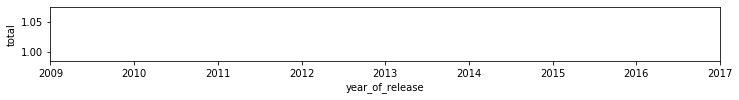

GC


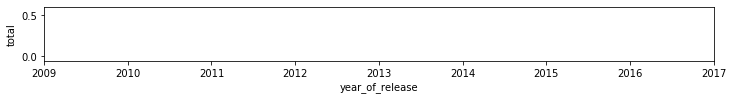

N64


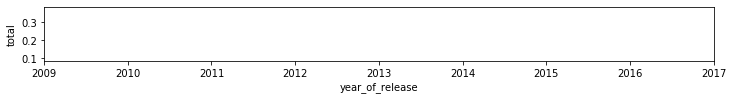

In [15]:
act_period = df.query('year_of_release >= 2010').copy(deep=True)
#получение самых популярных консолей
pp_act_period = act_period.pivot_table(index='platform',values='total',aggfunc='sum').sort_values(by='total',ascending=False).reset_index()
#постпоение диаграмм 
for i in act_period['platform'].unique(): #потенциально прибыльные выбраны визуальным сравнением графиков всех платформ не проекта
    print(i)
    act_period[act_period['platform'] == i].plot(kind='scatter',x='year_of_release',y='total',figsize=(12,1),xlim=(2009,2017),alpha=0.4,color='blue')
    plt.show()

Вывод:
   - как видно по диаграммам за последние десятилетие, есть платформы, которые:
    
        - уже потеряли свою актуальность: DC, N64, GC, GB, XB, PS, GBA, 2600
        - исчезли пять лет назад или уже находятся в конце десятилетия своего существования: PS2, Wii, X360, PS3, DS, PSP
        - являются перспективными для выпуска игр в 2017 году : PS4, 3DS, PSV, WiiU, XOne, PC

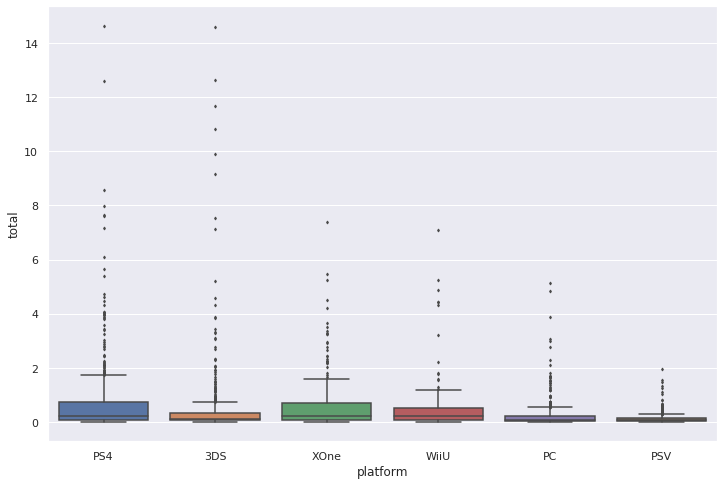

In [16]:
act_platform = ['PS4', '3DS', 'PSV', 'WiiU', 'XOne', 'PC']
data = act_period.query('platform ==@act_platform')
sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x='platform',y='total', data=data,fliersize=2)

Вывод: 
- По диаграммам разброса видно, что множество игр оказались малоуспешными. Также заметна особенность, что на платформах XBox и PS4 большеая часть игр на платформах приносит прибль.
- Разница между продажами на разных платформ связана с технологической конкурентноспособностью, популярностью и доступностью инструментов разработки. Так же выпуск популярных эксклюзивов, для определенных платформ.

-- Для более глубокого анализа рассмотрим влияют ли на продажи внутри одной популярной платформы отзывы пользователей и критиков.

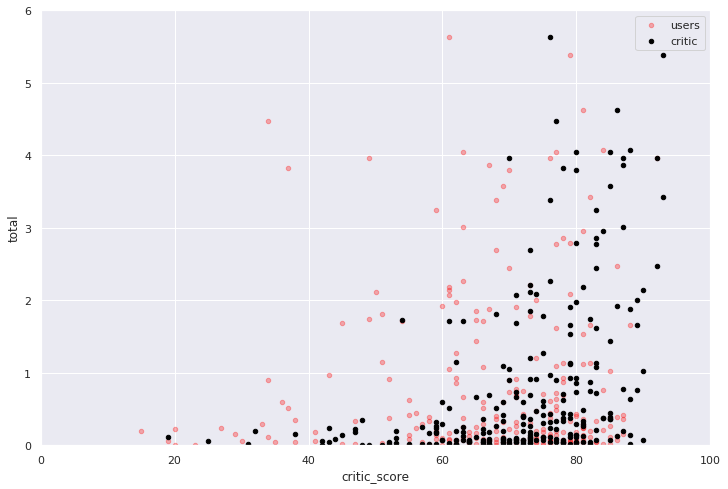

In [17]:
#act_period['user_100'] = 0
act_period.loc[:,'user_100'] = act_period['user_score']*10 #приведение оценок пользователей к общему масштабу
act_period_p_PS4 = act_period[act_period['platform'] =="PS4"].copy(deep=True)

ax = act_period_p_PS4.plot(y='total',x='user_100',kind='scatter',color='red',alpha=0.3,label='users')
act_period_p_PS4.plot(y='total',x='critic_score',kind='scatter',ax=ax,color='black',alpha=1,xlim=(0,100),ylim=(0,6),label='critic',legend=True)
#act_period.drop("user_100", axis=1, inplace=True)

In [18]:
#users_score
act_period_p_PS4_big0 = act_period_p_PS4.query('user_score>0')
print('Кореляция  оценок пользователей и общих продаж: {:.2f}'.format(act_period_p_PS4_big0['user_score'].corr(act_period_p_PS4_big0['total'])))
#critic_score
act_period_p_PS4_big0 = act_period_p_PS4.query('critic_score>0')
print('Кореляция оценок критиков и общих продаж: {:.2f}'.format(act_period_p_PS4_big0['critic_score'].corr(act_period_p_PS4_big0['total'])))

Кореляция  оценок пользователей и общих продаж: -0.03
Кореляция оценок критиков и общих продаж: 0.41


Вывод: 
   - Как видно и диаграммы рассеивания, у критиков в большей мере получается предсказывать успешные продажи игр чем у игроков (одна и таже игра находится на одной вертикали). Именно что предсказывать, тк большая часть игр с высокими оценками не оправдали надежды о продажах.
   - Коэф. корреляции подтверждает вывод выше, продажи ничтожно мало кореллируют с оценками игроков, а продажи и оценки критиков имеют слабую зависимость.

In [19]:
#critic_score
for i in act_platform:    
    pre_data = act_period.query('critic_score > 0')
    data= pre_data[pre_data['platform']==i]
    print('Корреляция между total и critic_score = {:.2f}'.format(data['total'].corr(data['critic_score'])),' для платформы:',i)
#users_score   
    pre_data = act_period.query('user_score>0')
    data=pre_data[pre_data['platform']==i]
    print('Корреляция между total и user_score = {:.2f}'.format(data['total'].corr(data['user_score'])),' для платформы:',i)
    print()                

Корреляция между total и critic_score = 0.41  для платформы: PS4
Корреляция между total и user_score = -0.03  для платформы: PS4

Корреляция между total и critic_score = 0.35  для платформы: 3DS
Корреляция между total и user_score = 0.22  для платформы: 3DS

Корреляция между total и critic_score = 0.13  для платформы: PSV
Корреляция между total и user_score = 0.01  для платформы: PSV

Корреляция между total и critic_score = 0.35  для платформы: WiiU
Корреляция между total и user_score = 0.40  для платформы: WiiU

Корреляция между total и critic_score = 0.42  для платформы: XOne
Корреляция между total и user_score = -0.07  для платформы: XOne

Корреляция между total и critic_score = 0.33  для платформы: PC
Корреляция между total и user_score = -0.02  для платформы: PC



Вывод:
 - Как видно из данных по разным платформам:
    - игры на платформе WiiU игроки имеют чуть большее представление о том какая игра будет успешней продаваться. Вероято всего из за того, что эта платформа является сугубо нишевой и больше ориентирована на спортивное время припровождение, пользователям проще оценить игру с небольшим набором механик. А критики используют механизмы оценки для более традиционных игр.
    - для остальных платформ справедлив вывод сделанный по PS4, критики в большей степени замечают механизмы успешности игры. Вероятно это связано с тем, что критики имеют более компетентный(насмотреный) подход в оценке игр, а игроки проводят в играх  меньше времени и не подходят к играм формально.

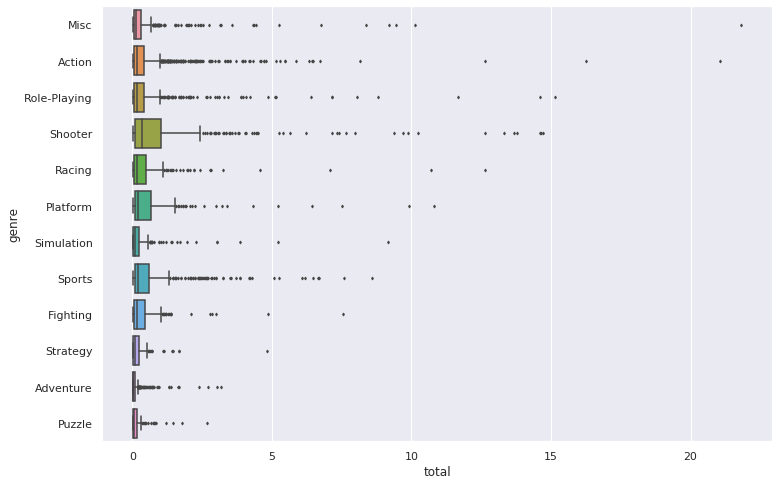

In [20]:
sns.boxplot(y='genre',x='total', data= act_period,fliersize=2)

Вывод:
- По общему распределению игр по жанрам можно сказать о том, что некоторые жанры выделяются как с низкими так и с высокими дохрдами. К примеру:

    - в тройку мало прибыльных жанров входят: Adventure, Pazzle, Stratagy
    - в тройку самых прибыльных жанров входят: Shooter, Platform, Sports

<a id="id4"></a>
## Шаг 4. Составление портрета пользователя каждого региона
[к содержанию](#id0)<br>
[портрет пользователя JP](#id44)<br>
[портрет пользователя EU](#id45)<br>
[портрет пользователя NA](#id46)<br>

<a id="id44"></a>
#### Определение для региона JP:
[к шагу 4](#id4)<br>
##### Популярыные платформы 
-- Популярные платформы из перспективных на следующие года

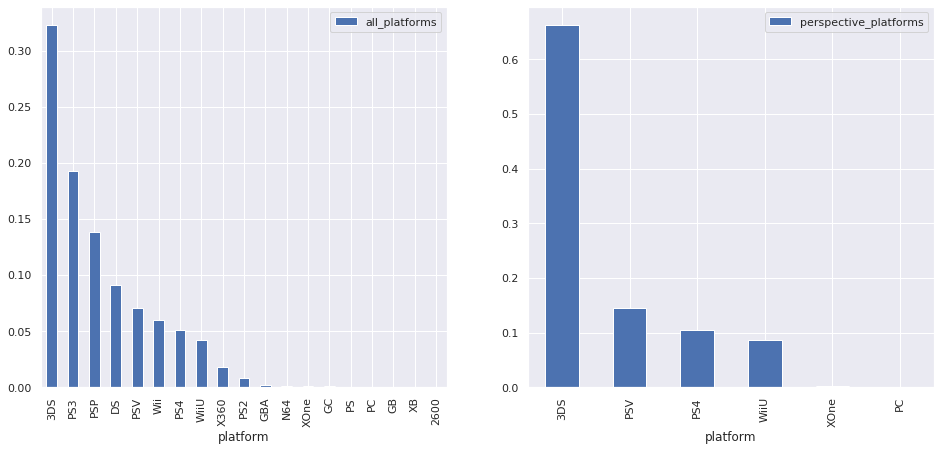

In [21]:
fig, axes = plt.subplots(1, 2)
#all_platforms
jp_pp1 = act_period.pivot_table(index='platform',values='jp_sales',aggfunc='sum').sort_values(by='jp_sales',ascending=False).reset_index()
jp_pp1['percent'] = jp_pp1['jp_sales'] /jp_pp1['jp_sales'].sum()
#jp_pp1.plot(kind='pie',y='percent',labels=jp_pp1['platform'],figsize=(12,12),ax=axes[0],legend=False,label='all_platforms')
jp_pp1.plot.bar(y='percent',x='platform',ax=axes[0],label='all_platforms')

#perspective_platforms
act_p_act_p = act_period.query('platform in @act_platform')
jp_pp2 = act_p_act_p.pivot_table(index='platform',values='jp_sales',aggfunc='sum').sort_values(by='jp_sales',ascending=False).reset_index()
jp_pp2['percent'] = jp_pp2['jp_sales'] /jp_pp2['jp_sales'].sum()
#jp_pp2.plot(kind='pie',y='percent',labels=jp_pp2['platform'],figsize=(12,12),ax=axes[1],legend=False,label='perspective_platforms')
jp_pp2.plot.bar(y='percent',x='platform',ax=axes[1],figsize=(16,7),label='perspective_platforms')

Вывод: 
- Топ-5 популярных платформ за актуальный период:
   - из всех платформ:
        -DS
        -3DS
        -PS3
        -PSP
        -Wii
   - и перспективных платформ:
        -3DS
        -PSV
        -PS4
        -WiiU
        -XOne

##### Популярные жанры

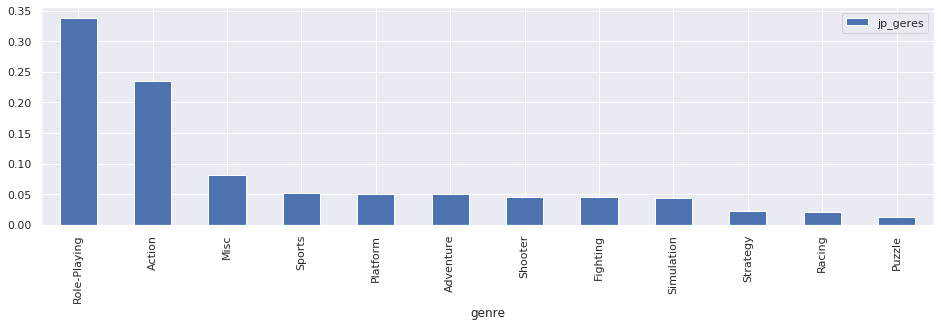

In [22]:
jp_pp_genre = act_period.pivot_table(index='genre',values='jp_sales',aggfunc='sum').sort_values(by='jp_sales',ascending=False).reset_index()
jp_pp_genre['percent'] = jp_pp_genre['jp_sales'] /jp_pp_genre['jp_sales'].sum()
#jp_pp_genre.plot(kind='pie',y='percent',labels=jp_pp_genre['genre'],figsize=(12,6),legend=False,label='jp_geres')
jp_pp_genre.plot.bar(y='percent',x='genre',figsize=(16,4),label='jp_geres')

Вывод:
- топ-5 жанров:
        
        -Role-playing
        -Action
        -Music
        -Sport
        -Platform

##### Популярность возрастных категорий:

c заполнением пропусков


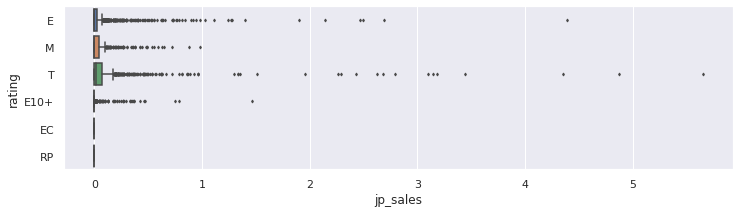

c пропусками


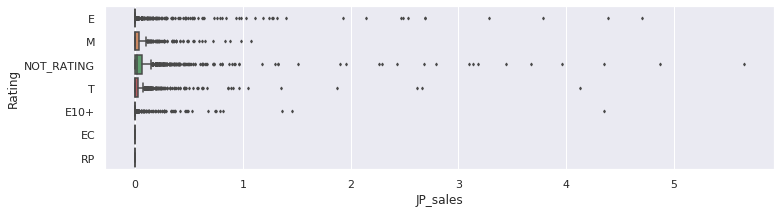

In [23]:
sns.set(rc={'figure.figsize':(12,3)})
print('c заполнением пропусков')
sns.boxplot(y='rating',x='jp_sales', data= act_period,fliersize=2)
#сравнение с незаполненной таблицей
df2['Rating']= df2['Rating'].fillna('NOT_RATING')
shadow_df = df2.query('Year_of_Release>2007')
plt.show()
print('c пропусками')
sns.boxplot(y='Rating',x='JP_sales', data= shadow_df,fliersize=2)

In [24]:
print('Сумарные продажи в регионе по рэйтингу')
shadow_df.pivot_table(index='Rating', values='JP_sales', aggfunc='sum' ).reset_index()

Сумарные продажи в регионе по рэйтингу


,Rating,JP_sales
0,E,77.17
1,E10+,25.67
2,EC,0.00
3,M,39.33
4,NOT_RATING,220.60
5,RP,0.00
6,T,64.51


Вывод:
- В дальнейшем будет использоваться таблица с пропусками, тк предположеение оказалось не верным и заполнение пропусков повлияло на количество игр в регионе, нарушив последовательность в рейтинге популярности.

- В регионе JP более успешно продаются игры с рейтингами:  M, T, E 
- Игры с неуказанным рэйтингом имеет существенную долю на рынке

    

<a id="id45"></a>
#### Определение для региона EU:
[к шагу 4](#id4)<br>
##### Популярыные платформы 
- за актуальный период и популярные платформы из перспективных на следующие года

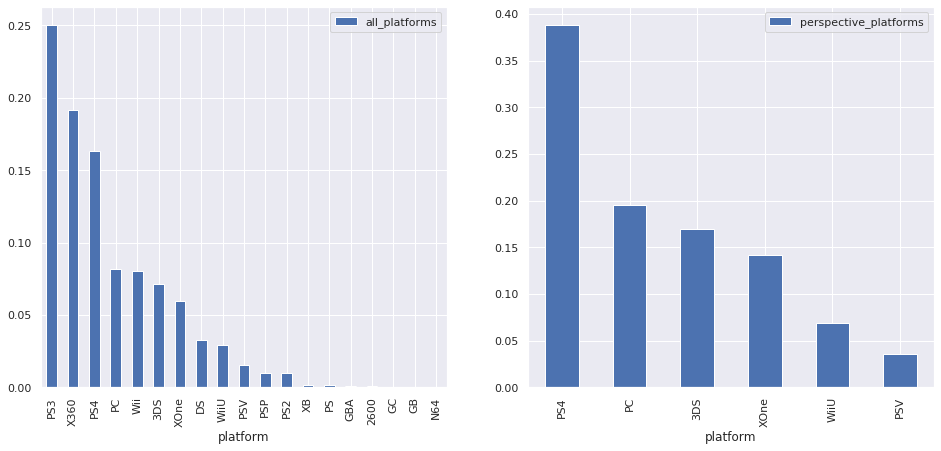

In [25]:
fig, axes = plt.subplots(1, 2)
#all_platforms
eu_pp1 = act_period.pivot_table(index='platform',values='eu_sales',aggfunc='sum').sort_values(by='eu_sales',ascending=False).reset_index()
eu_pp1['percent'] = eu_pp1['eu_sales'] /eu_pp1['eu_sales'].sum()
#eu_pp1.plot(kind='pie',y='percent',labels=eu_pp1['platform'],figsize=(12,12),ax=axes[0],legend=False,label='all_platforms')
eu_pp1.plot.bar(y='percent',x='platform',ax=axes[0],label='all_platforms')
#perspective_platforms
act_p_act_p = act_period.query('platform in @act_platform')
eu_pp2 = act_p_act_p.pivot_table(index='platform',values='eu_sales',aggfunc='sum').sort_values(by='eu_sales',ascending=False).reset_index()
eu_pp2['percent'] = eu_pp2['eu_sales'] /eu_pp2['eu_sales'].sum()
#eu_pp2.plot(kind='pie',y='percent',labels=eu_pp2['platform'],figsize=(12,12),ax=axes[1],legend=False, label='perspective_platforms')
eu_pp2.plot.bar(y='percent',x='platform',ax=axes[1],label='perspective_platforms',figsize=(16,7))

Вывод:
- Топ-5 популярных платформ за актуальный период:
   - из всех платформ:
        -PS3
        -X360
        -Wii
        -PS4
        -DS
   - и перспективных платформ:
        -PS4
        -PC
        -3DS
        -XOne
        -WiiU

##### Популярные жанры

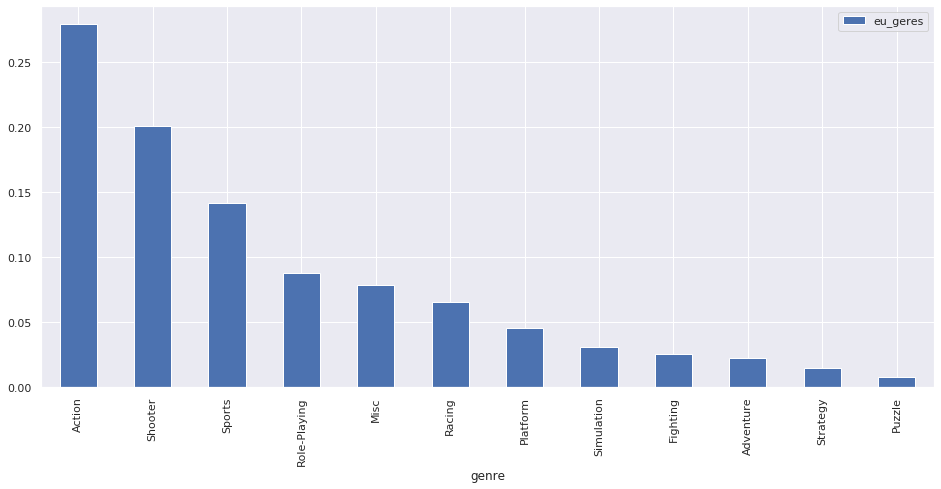

In [26]:
eu_pp_genre = act_period.pivot_table(index='genre',values='eu_sales',aggfunc='sum').sort_values(by='eu_sales',ascending=False).reset_index()
eu_pp_genre['percent'] = eu_pp_genre['eu_sales'] /eu_pp_genre['eu_sales'].sum()
#eu_pp_genre.plot(kind='pie',y='percent',labels=eu_pp_genre['genre'],figsize=(12,6),legend=False,label='eu_geres')
eu_pp_genre.plot.bar(y='percent',x='genre',label='eu_geres',figsize=(16,7))

Вывод:
- Топ-5 жанров:
        
        -Action
        -Shooter
        -Sport
        -Role-Playing
        -Music

##### Популярность возрастных категорий:

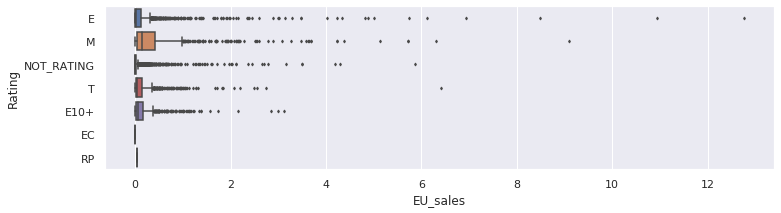

In [27]:
sns.boxplot(y='Rating',x='EU_sales', data= shadow_df,fliersize=2)

Вывод:

  - В регионе EU более успешно продаются игры с рейтингами:  M, T, E, E10+    

<a id="id46"></a>
#### Определение для региона NA:
[к шагу 4](#id4)<br>
##### Популярыные платформы 
-- Популярные платформы и перспективных на следующие года

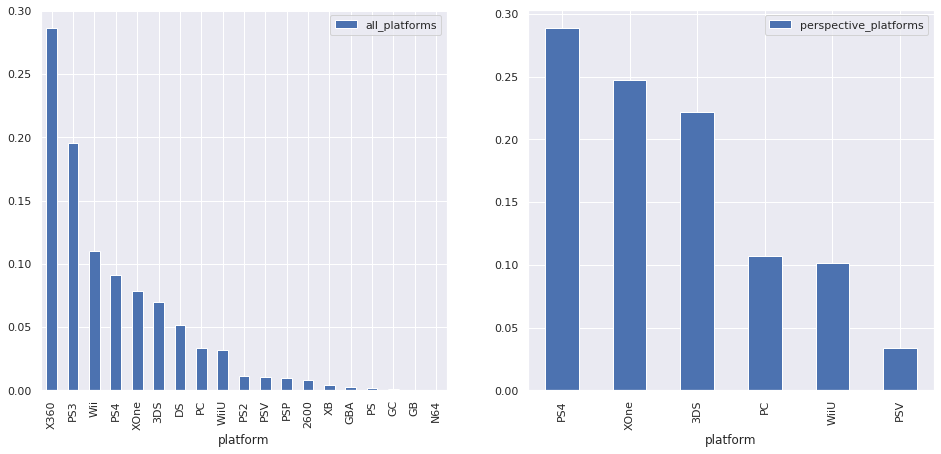

In [28]:
fig, axes = plt.subplots(1, 2)
#all_platforms
na_pp1 = act_period.pivot_table(index='platform',values='na_sales',aggfunc='sum').sort_values(by='na_sales',ascending=False).reset_index()
na_pp1['percent'] = na_pp1['na_sales'] /na_pp1['na_sales'].sum()
#na_pp1.plot(kind='pie',y='percent',labels= na_pp1['platform'],figsize=(12,12),ax=axes[0],legend=False,label='all_platforms')
na_pp1.plot.bar(y='percent',x='platform',ax=axes[0],label='all_platforms')
#perspective_platforms
act_p_act_p = act_period.query('platform in @act_platform')
na_pp2 = act_p_act_p.pivot_table(index='platform',values='na_sales',aggfunc='sum').sort_values(by='na_sales',ascending=False).reset_index()
na_pp2['percent'] = na_pp2['na_sales'] / na_pp2['na_sales'].sum()
#na_pp2.plot(kind='pie',y='percent',labels= na_pp2['platform'],figsize=(12,12),ax=axes[1],legend=False, label='perspective_platforms')
na_pp2.plot.bar(y='percent',x='platform',ax=axes[1],label='perspective_platforms',figsize=(16,7))

Вывод:
- Топ-5 популярных платформ за актуальный период:
   - из всех платформ:
        -X360
        -Wii
        -PS3
        -3DS
        -XOne
   - и перспективных платформ:
        -PS4
        -XOne
        -3DS
        -PC
        -WiiU

##### Популярные жанры

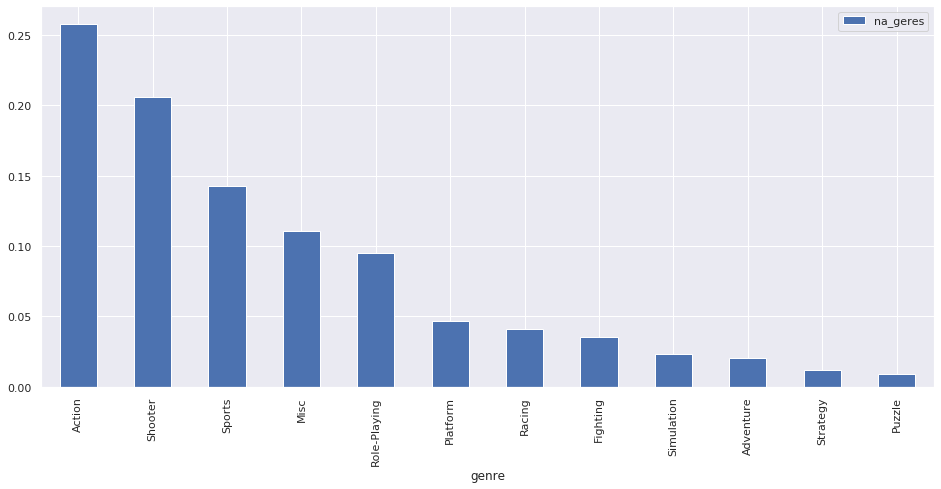

In [29]:
na_pp_genre = act_period.pivot_table(index='genre',values='na_sales',aggfunc='sum').sort_values(by='na_sales',ascending=False).reset_index()
na_pp_genre['percent'] = na_pp_genre['na_sales'] /na_pp_genre['na_sales'].sum()
#na_pp_genre.plot(kind='pie',y='percent',labels=na_pp_genre['genre'],figsize=(12,6),legend=False, label='na_geres')
na_pp_genre.plot.bar(y='percent',x='genre',label='na_geres',figsize=(16,7))

Вывод:
- Топ-5 жанров:
        
        -Action
        -Shooter
        -Sport
        -Music
        -Role-PLaying

##### Популярность возрастных категорий:

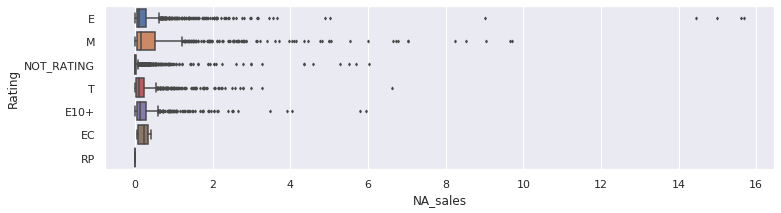

In [30]:
sns.boxplot(y='Rating',x='NA_sales', data= shadow_df,fliersize=2)

Вывод:

  - В регионе NA более успешно продаются игры с рейтингами:  M, EC, E, E10+, T  

##### Доли продаж по рейтингам
<a id="id666"></a>

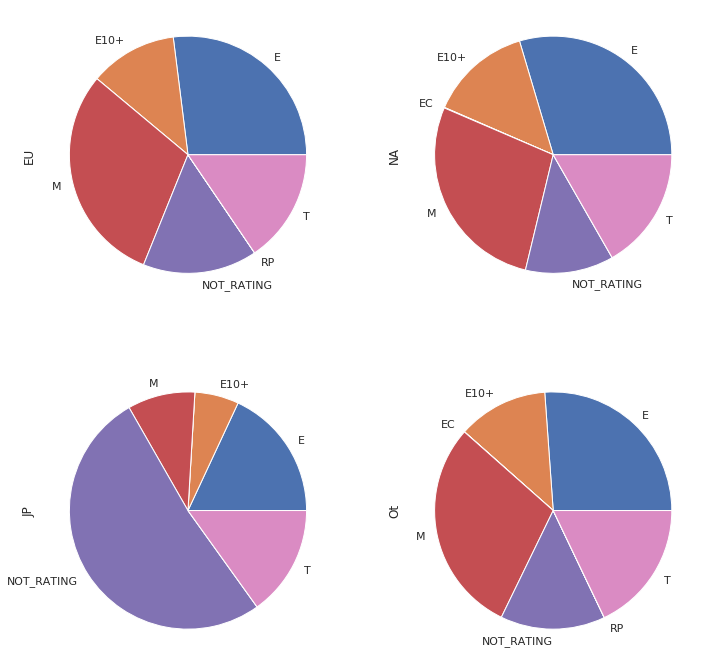

,EU_sales,JP_sales,NA_sales,Other_sales,EU,JP,NA,Ot
Rating,,,,,,,,
E,326.61,77.17,536.93,110.39,0.269861,0.180608,0.295886,0.261377
E10+,144.53,25.67,251.88,52.00,0.119418,0.060078,0.138804,0.123124
EC,0.00,0.00,1.32,0.08,0.000000,0.000000,0.000727,0.000189
M,362.65,39.33,502.60,123.88,0.299639,0.092047,0.276968,0.293318
NOT_RATING,188.85,220.60,218.51,60.33,0.156037,0.516289,0.120414,0.142847
RP,0.03,0.00,0.00,0.01,0.000025,0.000000,0.000000,0.000024
T,187.62,64.51,303.41,75.65,0.155021,0.150978,0.167200,0.179121


In [31]:
sales_on_raiting = shadow_df.pivot_table(index=['Rating'],values=['JP_sales','EU_sales','NA_sales','Other_sales'],aggfunc='sum')#.reset_index()
fig, axes = plt.subplots(2, 2)
count1 = 0
count2 = 0
for i in sales_on_raiting.columns:
        sales_on_raiting[i[0]+i[1]] = sales_on_raiting[i]/sales_on_raiting[i].sum()
        sales_on_raiting[i[0]+i[1]].plot(kind='pie',y='rating',ax=axes[count1,count2], figsize=(12,12))
        count1+=1
        if count1==2:
            count1=0
            count2=1
plt.show()
sales_on_raiting

Вывод: 
- Как видно из диаграмм, в разных регионах есть более популярные рэйтинги.  В Японии например характерены рейтинги "T" для тинейджеров и "E" для всех, но большую часть рынка занимают игры без указанного рэйтинга, а в Европе характерен "M", рейтинг для взрослых.
- как видно безрэйтинговые игры занимают не малую часть на рынке, по хорошему необходимо выяснить является ли это потеря данных при парсинге или действительно множество игр продаются без оценки ESRB.

<a id="id5"></a>
## Шаг 5. Проверка гипотез
[к содержанию](#id0)<br>

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

-- Используя выборку за актуальный период проверяется нулевая гипотиза, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Нулевая гипотеза формируется так, что бы использовался знак равенства. Для сравнениня средних значений, используется двусторонее t-тестирование. Альтернативная гипотиза говорит, что средние пользовательские рейтинги платформ Xbox One и PC разные.

In [32]:
pre_sample = act_period.query('user_score>0')
sample1 = pre_sample.query('platform=="XOne"')['user_score']

sample2 = pre_sample.query('platform=="PC"')['user_score']
print('дисперсия первой выборки:',sample1.var())
print('дисперсия второй выборки:',sample2.var())
alpha= 0.05
res = st.ttest_ind(sample1,sample2,equal_var=False)
print('P-значение', res.pvalue)
if (res.pvalue<alpha):
    print('Нулевую гипотезу отвергаем')
else:
    print('Нулевую гипотезу не отвергаем')

дисперсия первой выборки: 1.9069968429360695
дисперсия второй выборки: 2.433638857233721
P-значение 0.9325099343198802
Нулевую гипотезу не отвергаем


Вывод: 
-  Данные не противоречат Нулевой гипотизе.те средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

#### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

-- Используя выборку за актуальный период проверяется нулевая гипотиза, что Средние пользовательские рейтинги жанров Action и  и Sports одинаковые. Нулевая гипотеза формируется так, что бы использовался знак равенства. Для сравнениня средних значений, используется двусторонее t-тестирование. Альтернативная гипотиза говорит, что средние пользовательские рейтинги жанров Action и Sports разные.

In [33]:
sample1 = pre_sample.query('genre=="Action"')['user_score']
sample2 = pre_sample.query('genre=="Sports"')['user_score']
print('дисперсия первой выборки:',sample1.var())
print('дисперсия второй выборки:',sample2.var())
alpha= 0.05
res = st.ttest_ind(sample1,sample2, equal_var=False)
print('P-значение', res.pvalue)
if (res.pvalue<alpha):
    print('Нулевую гипотезу отвергаем')
else:
    print('Нулевую гипотезу не отвергаем')

дисперсия первой выборки: 1.8652936881585565
дисперсия второй выборки: 2.864311148791861
P-значение 2.2428127026996559e-13
Нулевую гипотезу отвергаем


Вывод: 
- Данные противоречат Нулевой гипотизе, те не противоречат альтернативной, где, средние пользовательские рейтинги жанров Action и Sports разные.

<a id="id6"></a>
## Шаг 6. Общий вывод
[к содержанию](#id0)<br>

-- Данные изначально были не обработаны - имели большое количество пропусков, были неудобные для обработки типы данных, столбец рэйтинга заполнен значениями 'tbd', а так же присутствовали типы данных неудобные для обработки и визуального анализа. Касательно анализа:
 - по годам заметен рост количества игр и изменение темпа роста с появлением новых платформ. Было обнаружено, что срок существования платформ равен порядка 10 лет, только PC сохроняет долгий жизненный цикл.
 - Выявлены перспективные платформы для 2017 года, это: PS4, 3DS, PSV, WiiU, XOne, PC 
 - на платформы  XBox и PS4  выпускают большее количечество успешных игр.
 - на примере платоформы PS4, была рассмотрена диаграмма рассеивания между оценками критиков/пользователей и продажами. Оценки пользователей в меньшей находятся в зависимости от продаж, а вот продажи в отношении оценок критиков имеют слабую зависимость. Эта логика подтверждается подсчетом коэф. кореляции для других платформ исключением является тлько WiiU, где оценка пользователей имеет слабую кореляцию с продажами, а оценки критиков несоизмеримо малую.
 - Портрет пользователя регионов:
      - JP: из персвективных и зарекоменддовавших себя платформ самая популярная 3DS, популярные жанры игр Role-playing, Action и Music, популярные возрастные категории "T" и "E" 
      - EU: самые популярнаые платформы S3, X360, Wii популярные жанры игр Action, Shooter и Sport, популярные возрастные категории "M" и "E"
      - NA: из персвективных и зарекоменддовавших себя платформ самая популярная PS4 популярные жанры игр Action, Shooter и Sport, популярные возрастные категории "M" и "E"
 - В результате проверки гипотез, было выявлено:
      - данные не противоречат нулевой гипотезе, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
      - данные не противоречат альтернативной гипотезе, что средние пользовательские рейтинги жанров Action и Sports разные.
##### Рекомендации      
- Из данных, с прогнозом на 2017 год, предлагается сконцентрироваться на продаже игр с более выявленным характерными паттерными успешной продажи - ориентироваться на регионы Европы и Америки, игры в жанре экшен или шутер на платформе PS4, с возростным рэйтингом М или Е. Эти регионы схожи в своих особенностях: в платформах, в жанрах и возрастных категориях, а также эти регионы имеют огромную долю продаж в индустрии игр. 
- Стоит перепроверить данные не имеющие возростного рейтинга, тк количество этих игр занимаает большую часть рынка в Японии (чуть менее в других регионах). Изучение неисследованной области безрейтинговых игр, сможет рассказать больше об игроках в регионе и составить для них валидные предложения.